<a href="https://colab.research.google.com/github/Krishnakumar-KKK/Krishnakumar-KKK/blob/main/Copy_of_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price predicting using past 60 days data**


> Using LSTM Recurrent Neural network - It uses sequential input data work with the Feed back using sequence of data- Input --> Encoder --> Decoder --> Dense--> Output



In [76]:
!pip install -q sklearn


In [77]:
%tensorflow_version 2.x

In [103]:
# import modules
import numpy as np
import math
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt,dates as mdates
from matplotlib import pyplot as plt, dates as mdates
from datetime import datetime as dt
import os
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')


In [104]:
#df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01',end='2021-12-17')
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-02-10']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'CGPOWER.NS' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df.dropna(subset = ["Close"], inplace=True)
#df =web.DataReader("AAPL", "av-daily", start=datetime(2017, 2, 9),end=datetime(2017, 5, 24),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
#df =web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,43.756840,44.484386,42.856064,43.098579,39.500023,1723914.0
1,2012-01-03,43.479675,43.999355,42.786774,43.566288,39.928673,2481913.0
2,2012-01-04,43.652901,45.714291,43.427708,44.917450,41.167019,4251670.0
3,2012-01-05,45.454449,46.389870,45.194611,45.454449,41.659184,3134281.0
4,2012-01-06,45.489098,45.696968,43.445030,43.774158,40.119186,5168505.0
...,...,...,...,...,...,...,...
2493,2022-02-03,176.850006,184.500000,174.699997,182.550003,182.550003,2882064.0
2494,2022-02-04,183.449997,188.500000,182.899994,185.600006,185.600006,6687911.0
2495,2022-02-07,185.699997,185.699997,177.000000,179.750000,179.750000,1890761.0
2496,2022-02-08,180.100006,180.199997,171.000000,172.899994,172.899994,1357275.0


In [105]:
df.shape

(2492, 7)

In [106]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,43.756840,44.484386,42.856064,43.098579,39.500023,1723914.0
1,2012-01-03,43.479675,43.999355,42.786774,43.566288,39.928673,2481913.0
2,2012-01-04,43.652901,45.714291,43.427708,44.917450,41.167019,4251670.0
3,2012-01-05,45.454449,46.389870,45.194611,45.454449,41.659184,3134281.0
4,2012-01-06,45.489098,45.696968,43.445030,43.774158,40.119186,5168505.0


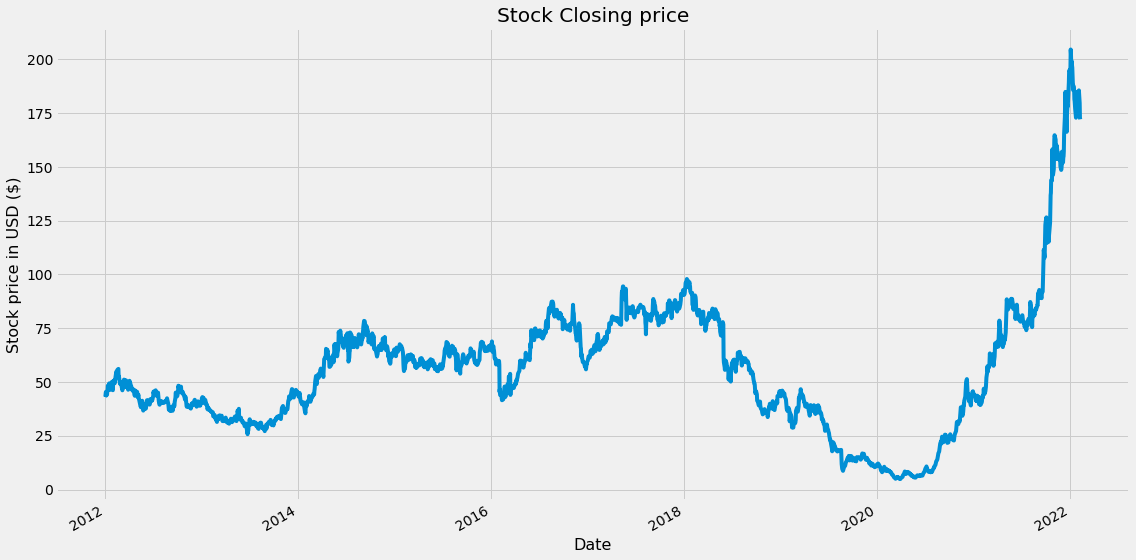

In [107]:



plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

dates = df['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = df['Close']
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
# Rotate and align the tick labels so they look better.

fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Stock Closing price')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Stock price in USD ($)',fontsize=16)

plt.show()


In [108]:
# Df colum only contains close prime
Data = df.filter(['Close'])
#Convert the data frame to numpy array
Data_frame = Data.values
Training_length = int(len(Data_frame)*0.95)

In [109]:

#scaling Preprocessing Normalizing to 0-1
Scaling = MinMaxScaler(feature_range=(0,1))
scaled_data = Scaling.fit_transform(Data_frame)
scaled_data

array([[0.19127981],
       [0.19362187],
       [0.20038783],
       ...,
       [0.87556332],
       [0.84126184],
       [0.8375062 ]])

In [110]:
# Splitting Training and testing data set
no_of_days = 340
Train_dataset = scaled_data[0:Training_length,:]
Testing_dataset = scaled_data [Training_length-no_of_days:,:]
x_train=[]
y_train=[]
for i in range (no_of_days,len(Train_dataset)):
  x_train.append(Train_dataset[i-no_of_days:i,0])
  y_train.append(Train_dataset[i])
  if i<=no_of_days:
    print(x_train)
    print(y_train)
    print()


[array([0.19127981, 0.19362187, 0.20038783, 0.20307685, 0.19466278,
       0.1964844 , 0.20385756, 0.2057659 , 0.21738945, 0.21773643,
       0.21461368, 0.22259404, 0.21192466, 0.20724052, 0.20793447,
       0.20914887, 0.21218487, 0.22242056, 0.22597701, 0.20724052,
       0.20680681, 0.2249361 , 0.22866606, 0.22415541, 0.22979371,
       0.22294101, 0.22684444, 0.23170206, 0.2374271 , 0.24983134,
       0.24124378, 0.2441063 , 0.25052529, 0.25408176, 0.25633707,
       0.23655967, 0.23890173, 0.23465131, 0.22172661, 0.22632398,
       0.22276753, 0.22233381, 0.22337473, 0.2126186 , 0.21131746,
       0.20654658, 0.2162618 , 0.21461368, 0.23144183, 0.23040091,
       0.22883954, 0.216869  , 0.21400648, 0.21981826, 0.22970697,
       0.2144402 , 0.2243289 , 0.21634854, 0.21391974, 0.21409323,
       0.20784773, 0.2150474 , 0.22667095, 0.22866606, 0.22710467,
       0.21574134, 0.21530763, 0.20975607, 0.20984281, 0.20732727,
       0.20489847, 0.20533219, 0.20862841, 0.20776099, 0.2029

In [111]:
#Convering into numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [112]:
#Reshaping of data

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

x_train.shape

(2027, 340, 1)

In [113]:
# Creating model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [114]:
model.compile (optimizer='adam',loss='mean_squared_error')

In [115]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2027/2027 [==============================] - 330s 161ms/step - loss: 6.2071e-04


In [117]:
# Splitting Training and testing data set
Train_dataset = scaled_data[0:Training_length,:]
Testing_dataset = scaled_data [Training_length-no_of_days:,:]
x_test=[]
y_test=scaled_data[Training_length:,:]
for i in range (no_of_days,len(Testing_dataset)):
  x_test.append(Testing_dataset[i-no_of_days:i,0])
  

In [118]:
#Converting into numpy
x_test,y_test = np.array(x_test),np.array(y_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_test.shape


(125, 340, 1)

In [119]:
prediction = model.predict(x_test)
prediction = Scaling.inverse_transform(prediction)


In [120]:
data = df

train_data = data[0:Training_length]
Valid = data[Training_length:]
Valid['Prediction']=prediction



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


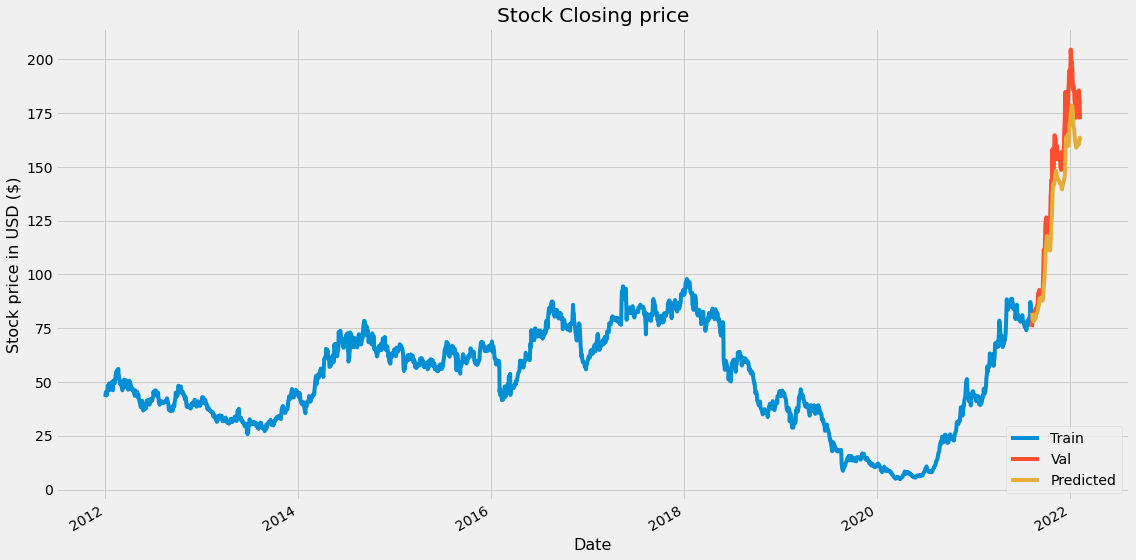

In [121]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

dates = train_data['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = train_data['Close']
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
# Rotate and align the tick labels so they look better.
dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Close']


ax.plot(x_values, y_values)


dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Prediction']


ax.plot(x_values, y_values)

fig.autofmt_xdate()


# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Stock Closing price')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Stock price in USD ($)',fontsize=16)
plt.legend(['Train','Val','Predicted'],loc='lower right')
plt.show()


In [122]:
print(prediction[:-1])

[[ 82.15728 ]
 [ 80.43716 ]
 [ 79.1825  ]
 [ 78.445816]
 [ 78.18071 ]
 [ 78.433525]
 [ 78.84251 ]
 [ 79.14436 ]
 [ 79.76715 ]
 [ 80.434105]
 [ 81.16024 ]
 [ 81.70164 ]
 [ 82.12507 ]
 [ 82.60927 ]
 [ 83.138275]
 [ 83.57997 ]
 [ 84.588776]
 [ 85.91016 ]
 [ 86.81327 ]
 [ 87.942764]
 [ 88.795395]
 [ 89.20921 ]
 [ 89.09909 ]
 [ 88.779495]
 [ 88.313805]
 [ 87.84763 ]
 [ 87.95525 ]
 [ 88.2818  ]
 [ 89.41221 ]
 [ 91.515915]
 [ 94.566055]
 [ 98.41071 ]
 [101.35027 ]
 [104.0042  ]
 [106.945435]
 [110.43629 ]
 [113.72409 ]
 [116.68354 ]
 [117.85543 ]
 [116.977264]
 [115.628204]
 [113.89567 ]
 [113.067566]
 [112.282585]
 [111.41372 ]
 [111.19474 ]
 [112.3146  ]
 [114.91232 ]
 [118.86214 ]
 [122.91678 ]
 [127.34699 ]
 [131.04832 ]
 [134.96645 ]
 [139.45139 ]
 [141.80531 ]
 [142.01517 ]
 [141.6127  ]
 [142.06532 ]
 [143.96678 ]
 [146.35153 ]
 [148.08597 ]
 [148.1621  ]
 [147.30615 ]
 [145.75438 ]
 [145.30162 ]
 [144.75658 ]
 [144.3342  ]
 [143.97636 ]
 [143.33032 ]
 [142.66284 ]
 [142.41655 ]
 [142.

In [123]:
#For prediction for future year
import queue
q1 = queue.Queue(no_of_days)
test_data = []


test_data = x_test[0].reshape(no_of_days,1)
print(test_data)
#prediction loop
Detection_Iteration = len (y_test)

[[0.        ]
 [0.00075113]
 [0.002003  ]
 [0.00325488]
 [0.00450676]
 [0.00575864]
 [0.00876314]
 [0.01201803]
 [0.01552328]
 [0.01752629]
 [0.01552328]
 [0.01352028]
 [0.01176765]
 [0.01352028]
 [0.01452178]
 [0.01577366]
 [0.01652479]
 [0.01552328]
 [0.01552328]
 [0.01527291]
 [0.01352028]
 [0.01176765]
 [0.01076615]
 [0.0122684 ]
 [0.01051577]
 [0.00876314]
 [0.00726089]
 [0.00851277]
 [0.00801202]
 [0.00650976]
 [0.00625939]
 [0.00550826]
 [0.00550826]
 [0.00400601]
 [0.00350526]
 [0.00325488]
 [0.00325488]
 [0.00425638]
 [0.00550826]
 [0.00701052]
 [0.00851277]
 [0.00701052]
 [0.00701052]
 [0.00701052]
 [0.00801202]
 [0.00801202]
 [0.00801202]
 [0.00676014]
 [0.00801202]
 [0.0092639 ]
 [0.00901352]
 [0.00826239]
 [0.00826239]
 [0.00776164]
 [0.00801202]
 [0.00951427]
 [0.01101652]
 [0.01276915]
 [0.01452178]
 [0.01627441]
 [0.01827742]
 [0.02028042]
 [0.02228342]
 [0.0245368 ]
 [0.02679018]
 [0.02929394]
 [0.02679018]
 [0.02428643]
 [0.02203305]
 [0.01977967]
 [0.01777666]
 [0.01

In [124]:
prediction_final=[]
for i in range(0,Detection_Iteration):

  test_data_reshaped = test_data.reshape(1,no_of_days,1)
  prediction = model.predict(test_data_reshaped)
  prediction_final.append(prediction[0])
  for x in range(0,no_of_days-1):
    test_data[x]=test_data[x+1]
  test_data[no_of_days-1]=prediction[0]

In [125]:
print(prediction_final)

prediction_final = Scaling.inverse_transform(prediction_final)
Valid['Prediction_final'] = prediction_final

[array([0.3868667], dtype=float32), array([0.38357687], dtype=float32), array([0.3806707], dtype=float32), array([0.3779354], dtype=float32), array([0.3752863], dtype=float32), array([0.37269917], dtype=float32), array([0.37017673], dtype=float32), array([0.3677302], dtype=float32), array([0.36537158], dtype=float32), array([0.3631102], dtype=float32), array([0.3609512], dtype=float32), array([0.35889578], dtype=float32), array([0.35694182], dtype=float32), array([0.35508436], dtype=float32), array([0.35331655], dtype=float32), array([0.3516302], dtype=float32), array([0.3500165], dtype=float32), array([0.3484663], dtype=float32), array([0.3469709], dtype=float32), array([0.34552193], dtype=float32), array([0.3441118], dtype=float32), array([0.34273368], dtype=float32), array([0.34138185], dtype=float32), array([0.34005117], dtype=float32), array([0.3387377], dtype=float32), array([0.33743814], dtype=float32), array([0.3361502], dtype=float32), array([0.33487177], dtype=float32), array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


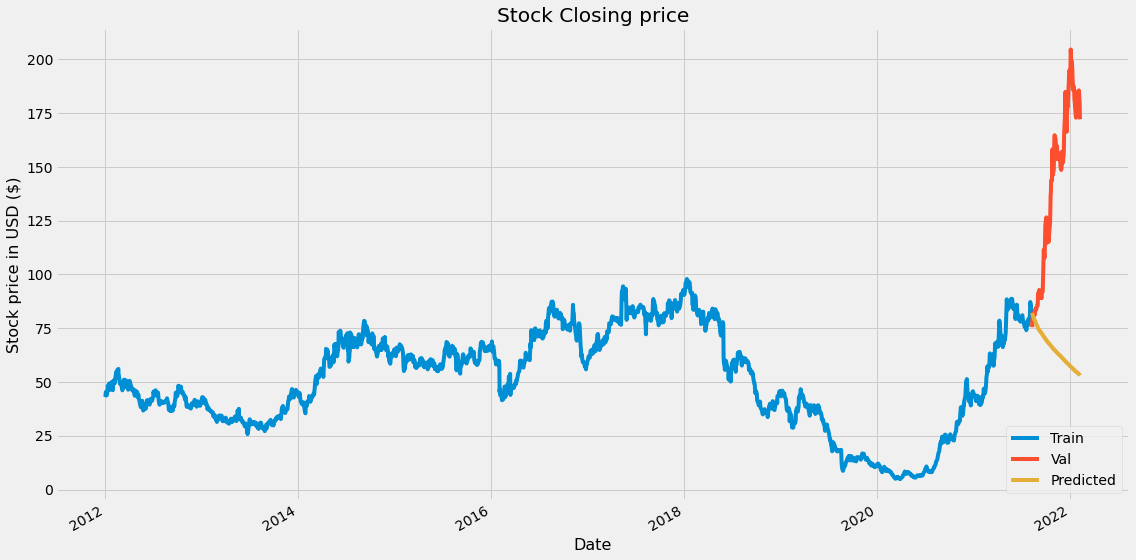

In [126]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

dates = train_data['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = train_data['Close']
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
# Rotate and align the tick labels so they look better.
dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Close']


ax.plot(x_values, y_values)


dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Prediction_final']


ax.plot(x_values, y_values)

fig.autofmt_xdate()


# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Stock Closing price')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Stock price in USD ($)',fontsize=16)
plt.legend(['Train','Val','Predicted'],loc='lower right')
plt.show()